# EDA of Waste Images Gathered

The waste_dataset consists of three categories
1. compostable
2. non-recyclable
3. recyclable



Images are being loaded daily from Google API (limit 100 images per day) to be added into each category. 

Images were also taken from the trashnet dataset and added into the recyclable and non-recyclable categories. 

Look at image count: 

In [3]:
import os
import glob

base_folder = "waste_dataset"

categories = ["compostable", "non-recyclable", "recyclable"]

image_counts = {}

for category in categories:
    folder_path = os.path.join(base_folder, category)
    #count JPG files in the folder
    image_counts[category] = len(glob.glob(os.path.join(folder_path, "*.jpg")))

for category, count in image_counts.items():
    print(f"{category}: {count} images")


compostable: 1022 images
non-recyclable: 375 images
recyclable: 2518 images


In [2]:
import os
import re
from collections import Counter

base_folder = "waste_dataset"

categories = ["compostable", "non-recyclable", "recyclable"]

for category in categories:
    folder_path = os.path.join(base_folder, category)
    
    files = os.listdir(folder_path)
    
    cleaned_files = [re.sub(r'[^a-zA-Z]', '', f.split('.')[0]) for f in files]
    counts = Counter(cleaned_files)
    
    print(f"Category: {category}")
    print("Unique filenames and their counts:")
    for name, count in counts.items():
        print(f"{name}: {count}")
    print(f"Total unique filenames: {len(counts)}\n")


Category: compostable
Unique filenames and their counts:
applecore: 227
orangepeel: 157
teabag: 73
teabags: 100
eggshell: 141
carrottops: 173
coffeegrounds: 86
bananapeel: 72
Total unique filenames: 8

Category: non-recyclable
Unique filenames and their counts:
styrofoamcup: 68
trash: 137
plasticwrap: 93
cigarettebutt: 77
Total unique filenames: 4

Category: recyclable
Unique filenames and their counts:
metal: 410
plastic: 482
cardboard: 403
newspaper: 33
paper: 594
glass: 501
glassjar: 50
plasticbottle: 45
Total unique filenames: 8



Example of what the images look like: 

Category: compostable


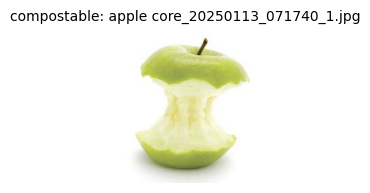

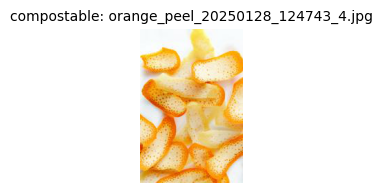

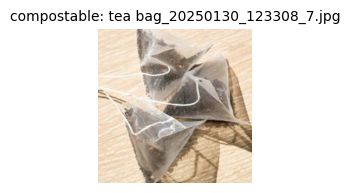

Category: non-recyclable


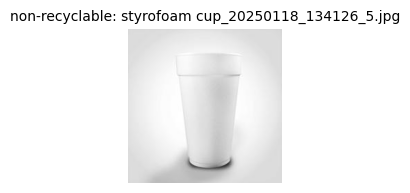

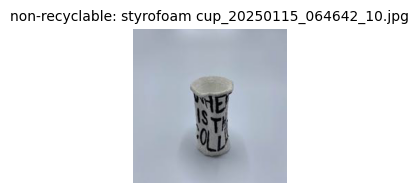

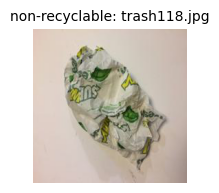

Category: recyclable


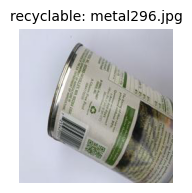

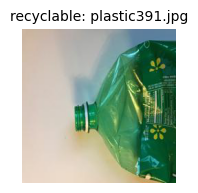

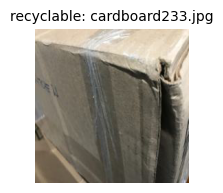

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base_folder = "waste_dataset"

categories = ["compostable", "non-recyclable", "recyclable"]

num_images_to_preview = 3

for category in categories:
    folder_path = os.path.join(base_folder, category)
    files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg'))]
    
    print(f"Category: {category}")
    for i, file in enumerate(files[:num_images_to_preview]):
        file_path = os.path.join(folder_path, file)
        
        img = mpimg.imread(file_path)
        
        plt.figure(figsize=(2, 2))  #fig size
        plt.imshow(img)
        plt.title(f"{category}: {file}", fontsize=10) 
        plt.axis('off')
        plt.show()
